In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import plotly.express as px


In [145]:
df = pd.read_csv("googleplaystore.csv")

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# Data Cleaning
1. Which of the following column(s) has/have null values?
<center>
<img src="1columns.png" >
</center>

`ANSWER`:
- `Rating`
- `Type`
- `Content Rating`
- `Current Ver`
- `Android Ver`

<Axes: >

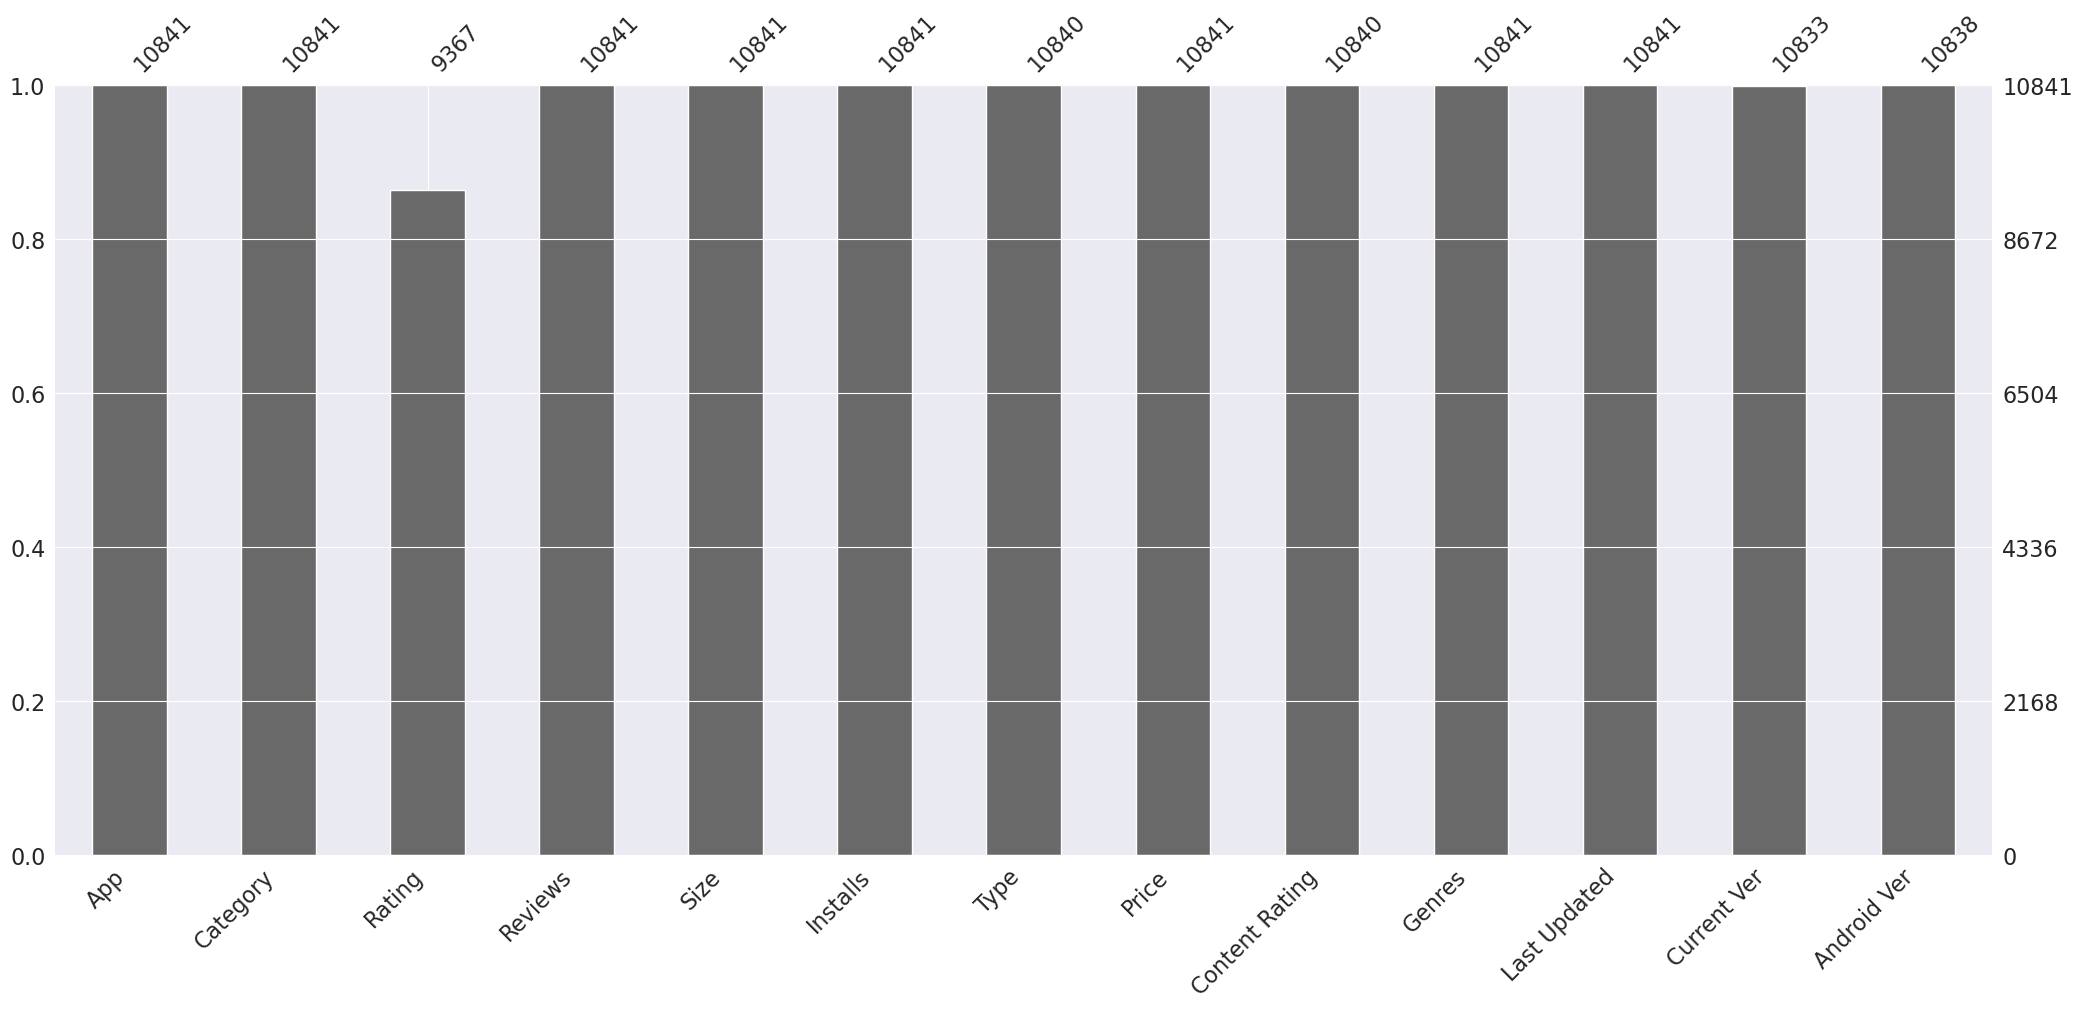

In [147]:
msno.bar(df)

In [148]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,Free,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,6-Jul-18,1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,20-Jan-17,1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device


In [149]:

import plotly.graph_objects as go

# Calculate missing values and convert to DataFrame
missing_values = df.isna().sum().sort_values(ascending=False).reset_index()
missing_values.columns = ['Column', 'Missing Values']

# Create the bar plot
fig = px.bar(missing_values, x='Column', y='Missing Values')

fig.update_layout(
    #xaxis=dict(tickangle=-45),  # Rotate x-axis labels for better readability
    hovermode='x',  # Hover mode to focus on x-axis
    template="plotly_white",
)

# Create the table
fig1 = go.Figure(data=[go.Table(
    header=dict(values=list(missing_values.columns),
                ),
    cells=dict(values=[missing_values['Column'], missing_values['Missing Values']],
               ))
])
fig1.update_layout(
    template="plotly_white",
)
# Show the table
fig.show()

# Show the figure
fig1.show()


#### 2. Clean the Rating column and the other columns containing null values
<center>
<img/ src = "2clean.png">
<center/>

In [150]:
# This is how you check for invalid values (greater than 5 or less than 1)
df.loc[df["Rating"]>5]
# we got 41 rows with invalid ratings

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
681,Adult Dirty Emojis,DATING,12.2,80,5.5M,"10,000+",Free,0,Teen,Dating,6-Nov-17,1,4.0.3 and up
2351,Brilliant Distinctions®,MEDICAL,11.0,78,72M,"50,000+",Free,0,Everyone,Medical,27-Jun-18,2.2.12,4.4 and up
2535,Patient Portal,MEDICAL,14.9,66,1.2M,"50,000+",Free,0,Everyone,Medical,25-Oct-16,1,4.0.3 and up
4226,How Old am I?,FAMILY,14.9,4635,3.9M,"1,000,000+",Free,0,Everyone,Entertainment,1-Jan-18,1.7,4.0 and up
4831,Z App,LIFESTYLE,11.7,405,25M,"50,000+",Free,0,Everyone,Lifestyle,22-Jun-18,4.2.45,4.4 and up
4913,Trane Interactive Smart AC,TOOLS,10.2,48,3.3M,"10,000+",Free,0,Everyone,Tools,21-Apr-16,0.0.2,4.3 and up
5041,AF Comics Reader - Free,COMICS,13.3,5,4.1M,100+,Free,0,Everyone,Comics,10-Nov-17,1,4.1 and up
5233,Club Penguin Island,FAMILY,10.7,107441,32M,"1,000,000+",Free,0,Everyone,Casual;Action & Adventure,10-Jul-18,1.10.5,4.4 and up
5236,AJ Bell Youinvest,FINANCE,12.3,135,5.3M,"10,000+",Free,0,Everyone,Finance,4-Jun-18,2.13.0.65,4.4 and up
5239,Baby Game Animal Jam Free,GAME,10.5,9,26M,500+,Free,0,Everyone,Board,24-Mar-17,1,2.3 and up


In [151]:
# This is how we check for null values
df.loc[pd.isna(df["Rating"])]
# We got 1474 rows with with null ratings

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,7-Mar-18,1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,20-Sep-17,8,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,23-Jul-18,1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,17-Jul-18,1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,8-Aug-17,2,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,31-Jul-18,2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,2-Feb-18,1,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,13-Jun-18,2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,29-Sep-16,1.1.5,4.0 and up


In [152]:
1474+41


1515

In [153]:
# Wit numpy, we change all the invalid values to nan
df.loc[df["Rating"]>5,"Rating"] = np.nan

In [154]:
df["Rating"].describe()


count    9326.000000
mean        4.197727
std         0.508178
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [155]:
df["Rating"].mean()

4.197726785331332

In [156]:
df.loc[pd.isna(df["Rating"])]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,7-Mar-18,1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,20-Sep-17,8,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,23-Jul-18,1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,17-Jul-18,1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,8-Aug-17,2,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,31-Jul-18,2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,2-Feb-18,1,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,13-Jun-18,2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,29-Sep-16,1.1.5,4.0 and up


In [157]:
# Fill all the null values with the mean of the whole column
df["Rating"] = df["Rating"].fillna(df["Rating"].mean())

df.loc[pd.isna(df["Rating"])]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [158]:
# Mean remains the same
df["Rating"].mean()

4.197726785331332

In [161]:
# look for all rows with any missing values
df[df.isna().any(axis=1)]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.200000,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,6-Jun-18,NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.100000,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,12-Feb-13,NaN,1.5 and up
4453,[substratum] Vacuum: P,PERSONALIZATION,4.400000,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,20-Jul-18,4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.500000,189,2.1M,"10,000+",Free,0,Everyone,Personalization,27-Mar-18,1.1,NaN
6322,Virtual DJ Sound Mixer,TOOLS,4.200000,4010,8.7M,"500,000+",Free,0,Everyone,Tools,10-May-17,NaN,4.0 and up
6803,BT Master,FAMILY,4.197727,0,222k,100+,Free,0,Everyone,Education,6-Nov-16,NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.000000,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,18-Apr-18,NaN,4.0 and up
7407,Calculate My IQ,FAMILY,4.197727,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,3-Apr-17,NaN,2.3 and up
7730,UFO-CQ,TOOLS,4.197727,1,237k,10+,Paid,$0.99,Everyone,Tools,4-Jul-16,NaN,2.0 and up
9148,Command & Conquer: Rivals,FAMILY,4.197727,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,28-Jun-18,Varies with device,Varies with device


In [169]:
# Dropping all null values
df = df.dropna()

In [172]:
# Now this should not return any rows
df[df.isna().any(axis=1)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
